<a href="https://colab.research.google.com/github/vishalsingh1080/Netflix-Movies-tvShow-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

In [57]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
df = pd.read_csv('/content/gdrive/My Drive/netflix-clustering/netflix_movies_TVshows.csv',parse_dates=[6,7])

In [60]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020-01-01,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016-01-01,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011-01-01,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009-01-01,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016-01-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019-01-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997-01-01,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019-01-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008-01-01,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   datetime64[ns]
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 730.2+ KB


In [62]:
print('The no. of unique shows and movies in the dataset is: {}'.format(df.show_id.nunique()))

The no. of unique shows and movies in the dataset is: 7787


In [63]:
df['date_added'].dt.year.unique()

array([2020., 2016., 2018., 2017., 2019., 2021., 2015., 2013., 2011.,
         nan, 2012., 2014., 2008., 2009., 2010.])

In [64]:
print(type(df['director'].iloc[3]))
df['director'].iloc[3]

<class 'str'>


'Shane Acker'

In [65]:
print(type(df['title'].iloc[45]))
df['title'].iloc[45]

<class 'str'>


'Şubat'

In [66]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [67]:
df['listed_in'].iloc[3].split(',')

['Action & Adventure', ' Independent Movies', ' Sci-Fi & Fantasy']

#Univariate analysis:

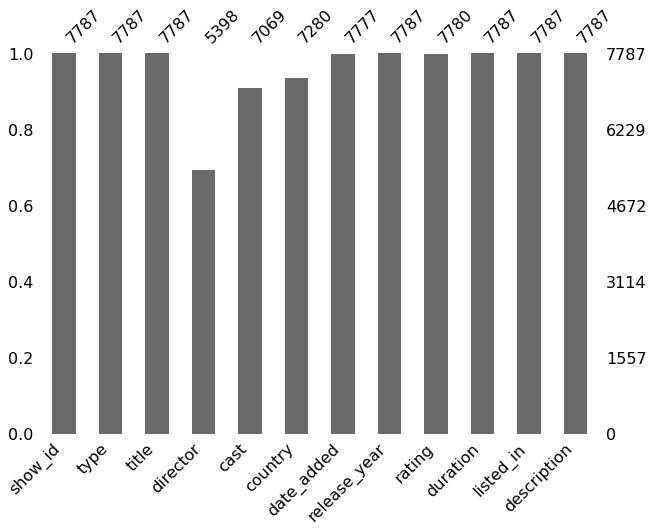

In [68]:
msno.bar(df,figsize=(10,7))

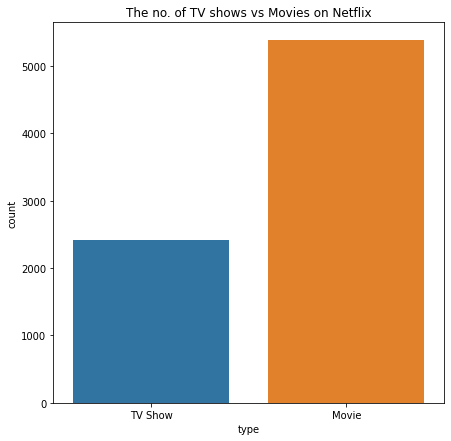

In [69]:
plt.figure(figsize=(7,7))
plt.title('The no. of TV shows vs Movies on Netflix')
sns.countplot(x='type',data=df)
plt.show()

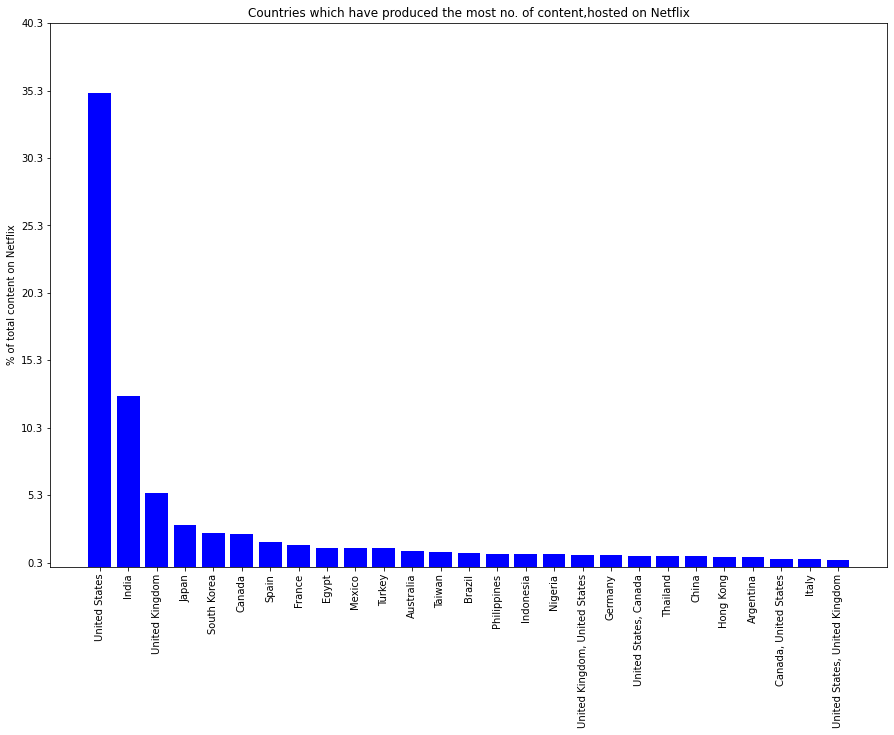

In [70]:
# country
country_count = df.country.value_counts(normalize=True)
country_count = country_count * 100
country100 = country_count[country_count > 0.5]
plt.figure(figsize=(15,10))
height = country100.values
bars = country100.index
y_pos = np.arange(len(bars)) 
# Creating bars
plt.title('Countries which have produced the most no. of content,hosted on Netflix')
plt.bar(y_pos, height,color='blue') 
# Creating names on the x-axis
plt.yticks(np.arange(0.3,45,5))
plt.ylabel('% of total content on Netflix')
plt.xticks(y_pos, bars,rotation=90)
plt.show()

In [71]:
df.director.value_counts()

Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
                            ..
Radhika Rao, Vinay Sapru     1
Wolfgang Petersen            1
Sanjay Dayma                 1
Pramod Pawar                 1
Alessio Cremonini            1
Name: director, Length: 4049, dtype: int64

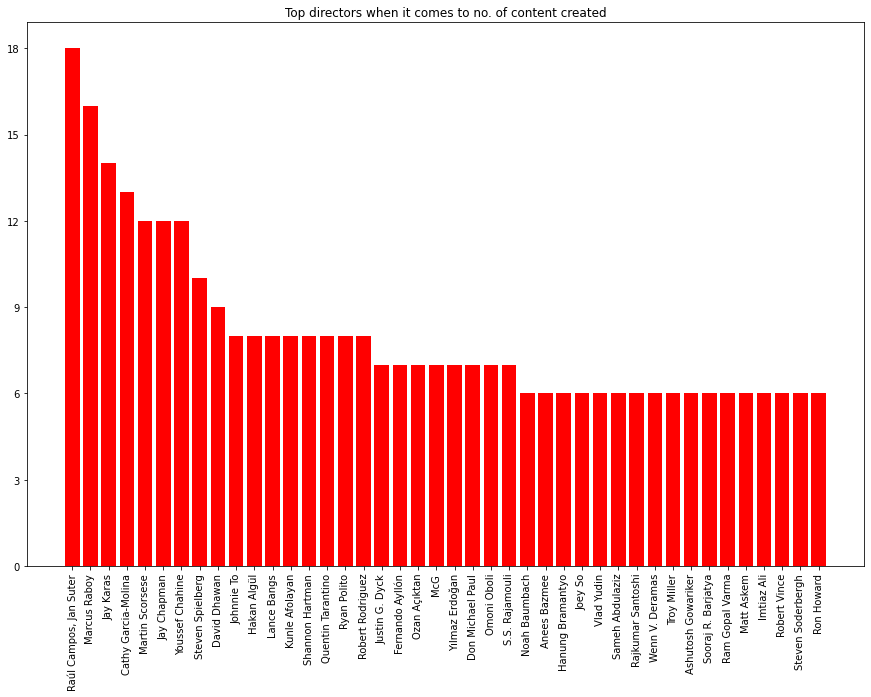

In [72]:
# the no. of content produced by each director in the dataset
content_count = df.director.value_counts()
# directors who have more than 5 content to their credit
count5 = content_count[content_count.values > 5]
plt.figure(figsize=(15,10))
height = count5.values
bars = count5.index
y_pos = np.arange(len(bars)) 
# Creating bars
plt.title('Top directors when it comes to no. of content created')
plt.bar(y_pos, height,color='red') 
# Creating names on the x-axis
plt.yticks(np.arange(0,20,3))
plt.xticks(y_pos, bars,rotation=90)
plt.show()

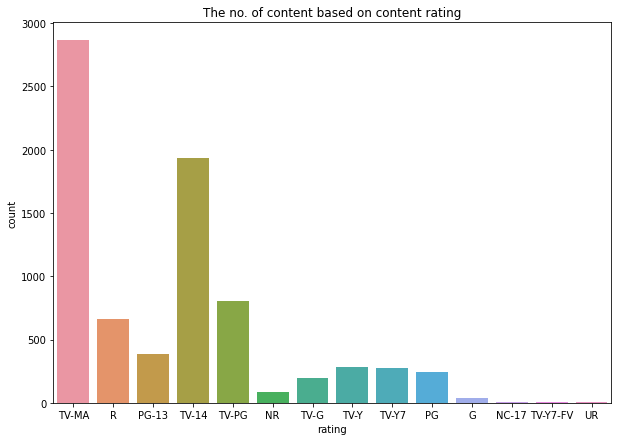

In [73]:
plt.figure(figsize=(10,7))
plt.title('The no. of content based on content rating')
sns.countplot(x='rating',data=df)
plt.show()

In [74]:
df_movie = df[df['type']=='Movie']
sep = lambda x: x.split()
dur = df_movie['duration'].apply(lambda x: sep(x)[0])
dur = dur.astype(int)

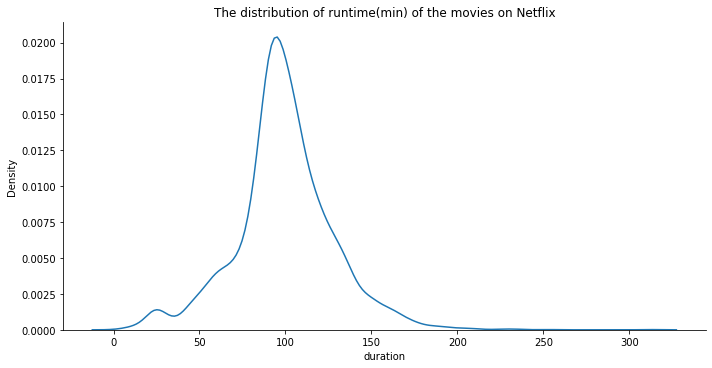

In [75]:
sns.displot(x=dur, kind="kde",height=5,aspect=2).set(title='The distribution of runtime(min) of the movies on Netflix')
plt.show()

In [76]:
df_tv = df[df['type']=='TV Show']
sep = lambda x: x.split()
dur = df_tv['duration'].apply(lambda x: sep(x)[0])
dur = dur.astype(int)

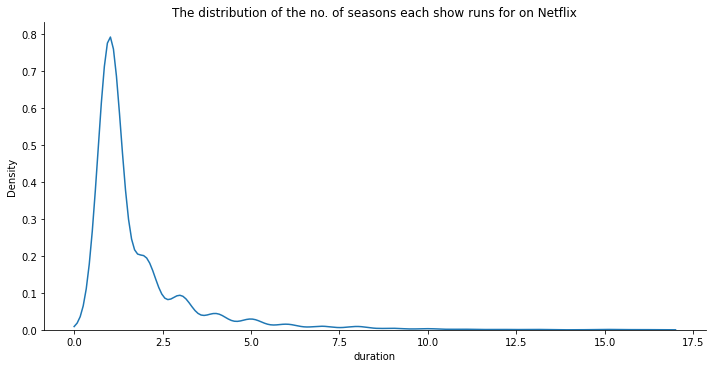

In [77]:
sns.displot(x=dur, kind="kde",height=5,aspect=2).set(title='The distribution of the no. of seasons each show runs for on Netflix')
plt.show()

In [78]:
def genre_ls(x):

    ls = []   
    for word in x.split(','):
        wlc = word.lower()
        wlc = wlc.strip()
        ls.append(wlc)

    return ls

In [79]:
genre_words = []
_ = df['listed_in'].apply(lambda x: genre_words.extend(genre_ls(x)))
ls = ' '.join(genre_words)

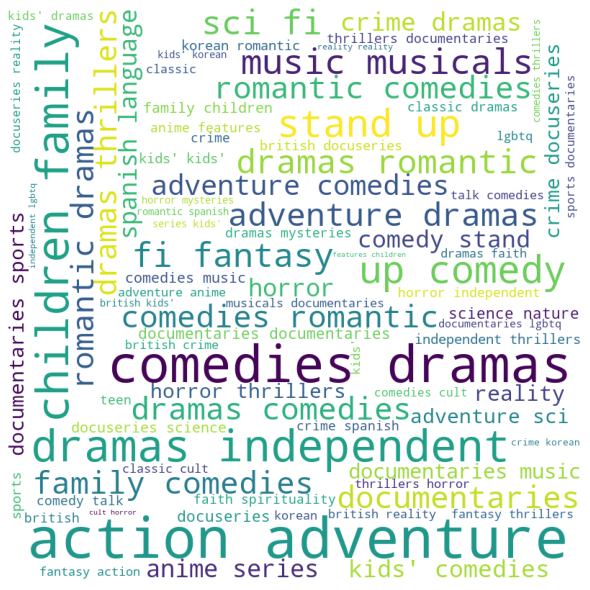

In [80]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = ('tv','movies','shows','international'),
                min_font_size = 10).generate(ls)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#Bivariate analysis

In [81]:
df_yr = df.copy()
df_yr['date_added_year'] = df_yr['date_added'].dt.year
test = pd.DataFrame({'count' : df_yr.groupby( ['date_added_year','type'] ).size()}).reset_index()


In [82]:
test_tv = test[test['type']=='TV Show']
test_tv.drop('type',axis=1,inplace=True)
test_movie = test[test['type']=='Movie']
test_movie.drop('type',axis=1,inplace=True)


In [83]:
tv_dic = dict(test_tv.values)
movie_dic = dict(test_movie.values)

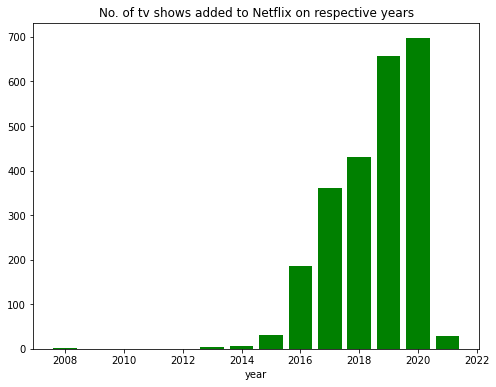

In [84]:
plt.figure(figsize=(8,6))
plt.title('No. of tv shows added to Netflix on respective years')
plt.bar(list(tv_dic.keys()), tv_dic.values(), color='g')
plt.xlabel('year')
plt.show()


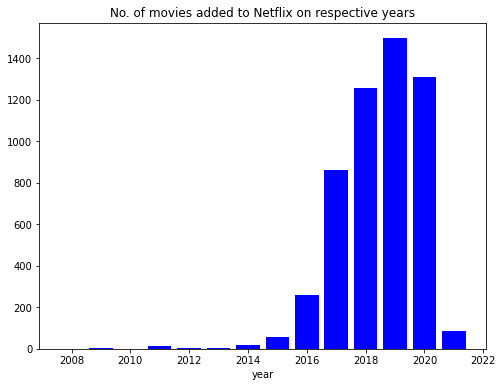

In [85]:
plt.figure(figsize=(8,6))
plt.title('No. of movies added to Netflix on respective years')
plt.bar(list(movie_dic.keys()),movie_dic.values(), color='b')
plt.xlabel('year')
plt.show()

#Clustering

In [86]:
df1 = df[['director','cast','listed_in','description']]
df1.replace(np.nan, ' ',inplace=True)
df1['summary'] = df1.director + ' ' + df1.cast+ ' ' + df1.listed_in + ' ' + df1.description

In [87]:
def clean_txt(x):

    x = re.sub(r'[^\w\s]', '', x)
    x = x.lower()
    return x
    

In [88]:
df1['summary'] = df1['summary'].apply(clean_txt)
df1.head()

,director,cast,listed_in,description,summary
0,,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,joão miguel bianca comparato michel gomes ro...
1,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,jorge michel grau demián bichir héctor bonilla...
2,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow...",gilbert chan tedd chan stella chung henley hii...
3,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",shane acker elijah wood john c reilly jennifer...
4,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...,robert luketic jim sturgess kevin spacey kate ...


In [89]:
stop_words = stopwords.words('english')
doc = df1['summary'].values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 10000)
X = vectorizer.fit_transform(doc)

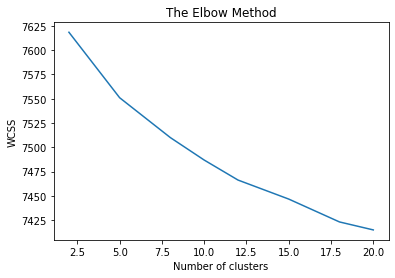

In [ ]:

wcss = []
num_clusters = [2,5,8,10,12,15,18,20]
for i in num_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(num_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [90]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in tqdm(range(2,22,2)):
    
    kmeans = KMeans(n_clusters = i, init='k-means++',max_iter=300,n_init=10,random_state=123)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    sil_scores.append(silhouette_score(X, labels))



  0%|          | 0/10 [00:00<?, ?it/s]

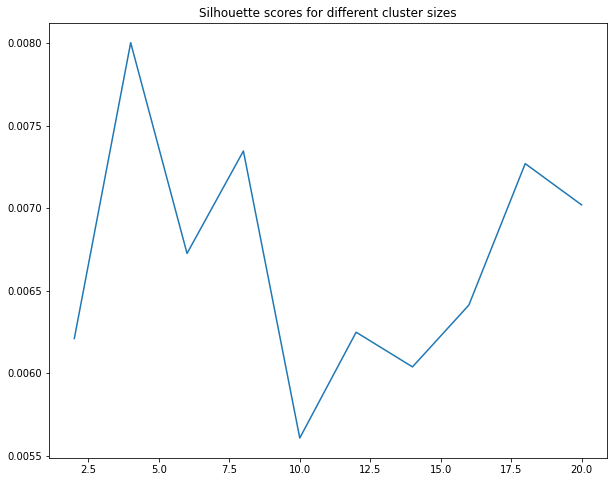

In [95]:
num = list(range(2,22,2))
plt.figure(figsize=(10,8))
sns.lineplot(x=num,y=sil_scores).set(title='Silhouette scores for different cluster sizes')
plt.show()

In [96]:
kmeans = KMeans(n_clusters = 8, n_init = 10, n_jobs = -1) 
kmeans.fit(X)
words = vectorizer.get_feature_names()

In [100]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-100:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : standup, comedy, comedian, special, comic, talk, stage, show, takes, jay, shows, sex, suter, riffs, campos, life, raúl, shares, humor, jan, stories, jeff, live, bill, tv, raboy, jokes, topics, funny, dunham, delivers, celebrity, karas, kevin, hilarious, hart, marcus, jim, star, take, laughs, culture, set, chris, observations, mike, first, politics, new, everything, tackles, burr, relationships, michael, audience, gaffigan, comedies, filmed, dave, york, seinfeld, personal, chapman, unique, childhood, modern, russell, night, brings, delia, martin, like, ryan, specials, jefferies, birbiglia, offers, shlesinger, iliza, jerry, katt, hartman, love, tom, vir, comedians, segura, tim, hits, john, chappelle, raunchy, bangs, packed, williams, miller, american, comedic, polito
1 : action, adventure, movies, international, scifi, fantasy, michael, dramas, comedies, john, tv, david, james, young, man, must, khan, two, mission, chan, agent, sam, features, tom, paul, finds, robert, scott, kapoor, 